# Velocity of Money Analysis

## Importing Modules

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

## Getting Velocity Data

In [606]:
velocity_M1 = pd.read_csv('M1V.csv', index_col = 0)
velocity_M1.index = pd.to_datetime(velocity_M1.index)

velocity_M2 = pd.read_csv('M2V.csv', index_col = 0)
velocity_M2.index = pd.to_datetime(velocity_M2.index)

velocity_MZM = pd.read_csv('MZMV.csv', index_col = 0)
velocity_MZM.index = pd.to_datetime(velocity_MZM.index)

In [704]:
velocity_M1 = velocity_M1.resample('Y').mean().loc[:'2018']
velocity_M2 = velocity_M2.resample('Y').mean().loc[:'2018']
velocity_MZM = velocity_MZM.resample('Y').mean().loc[:'2018']

## Getting Mkt Cap Data

In [750]:
mkt_cap = pd.read_csv('market_cap_usa.csv', sep = ';')
mkt_cap = mkt_cap.T.loc['1980':'2018']
mkt_cap.columns = ['MktCap']
mkt_cap.index = pd.to_datetime(mkt_cap.index)
mkt_cap['MktCap'] = mkt_cap['MktCap'].astype(float)

## Get Money Data

In [613]:
m2_data = pd.read_csv('M2_money_stock.csv', index_col = 0)
m1_data = pd.read_csv('M1_money_stock.csv', index_col = 0)
m0_data = pd.read_csv('monetary_base_curr_in_circulation.csv', index_col = 0)
gdp_data = pd.read_csv('GDP.csv', index_col = 0)

In [759]:
m2_data.index = pd.to_datetime(m2_data.index)
m2_data.columns = ['M2']
m2_data = m2_data.resample('Y').mean().loc[:'2018']

In [760]:
m1_data.index = pd.to_datetime(m1_data.index)
m1_data.columns = ['M1']
m1_data = m1_data.resample('Y').mean().loc[:'2018']

In [761]:
m0_data.index = pd.to_datetime(m0_data.index)
m0_data.columns = ['M0']
m0_data = m0_data.resample('Y').mean().loc[:'2018']

In [762]:
gdp_data.index = pd.to_datetime(gdp_data.index)
gdp_data.columns = ['GDP']
gdp_data = gdp_data.resample('Y').mean().loc[:'2018']

## Differentiating Data for stationarity

In [619]:
# MktCap test
p_value = adfuller(mkt_cap.values)[1]
print(p_value)

0.9953318299509404


2.7093485941217984e-07
(38, 1)


<AxesSubplot:>

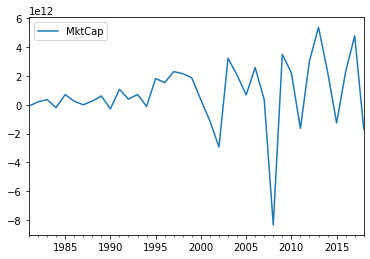

In [752]:
stationary_mkt_cap = (mkt_cap - mkt_cap.shift(1)).dropna()
p_value = adfuller(stationary_mkt_cap.values)[1]
print(p_value)
print(stationary_mkt_cap.shape)
stationary_mkt_cap.plot()

In [621]:
# velocity  M1 test
p_value = adfuller(velocity_M1.values)[1]
print(p_value)

0.35473299935791586


0.002867041576607827
(59, 1)


<AxesSubplot:xlabel='DATE'>

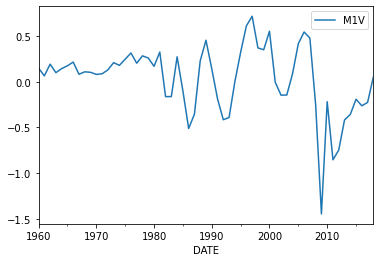

In [753]:
stationary_velocity_M1 = (velocity_M1 - velocity_M1.shift(1)).dropna()
p_value = adfuller(stationary_velocity_M1.values)[1]
print(p_value)
print(stationary_velocity_M1.shape)
stationary_velocity_M1.plot()

In [707]:
# MZMV Test
p_value = adfuller(velocity_MZM.values)[1]
print(p_value)

0.7076863118852892


2.037091672841997e-05
(59, 1)


<AxesSubplot:xlabel='DATE'>

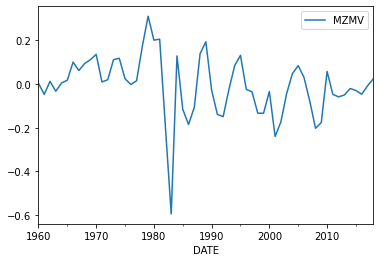

In [754]:
stationary_velocity_MZM = (velocity_MZM - velocity_MZM.shift(1)).dropna()
p_value = adfuller(stationary_velocity_MZM.values)[1]
print(p_value)
print(stationary_velocity_MZM.shape)
stationary_velocity_MZM.plot()

In [709]:
# velocity  M2 test
p_value = adfuller(velocity_M2.values)[1]
print(p_value) 

0.6788612176409893


3.061568615954584e-05
(59, 1)


<AxesSubplot:xlabel='DATE'>

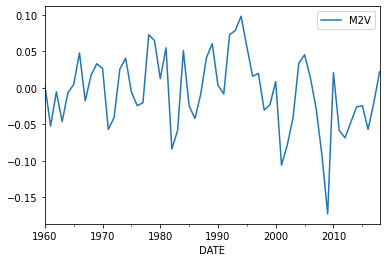

In [755]:
stationary_velocity_M2 = (velocity_M2 - velocity_M2.shift(1)).dropna()
p_value = adfuller(stationary_velocity_M2.values)[1]
print(p_value)
print(stationary_velocity_M2.shape)
stationary_velocity_M2.plot()

In [763]:
#  M0 test
p_value = adfuller(m0_data.values)[1]
print(p_value) 

1.0


0.00016350267425064216
(59, 1)


<AxesSubplot:xlabel='DATE'>

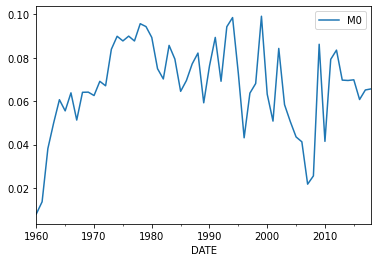

In [764]:
stationary_m0 = (np.log(m0_data) - np.log(m0_data.shift(1))).dropna()
p_value = adfuller(stationary_m0.values)[1]
print(p_value)
print(stationary_m0.shape)
stationary_m0.plot()

In [765]:
#  M1 test
p_value = adfuller(m1_data.values)[1]
print(p_value) 

0.995950225629486


0.05035878157575953
(43, 1)


<AxesSubplot:xlabel='DATE'>

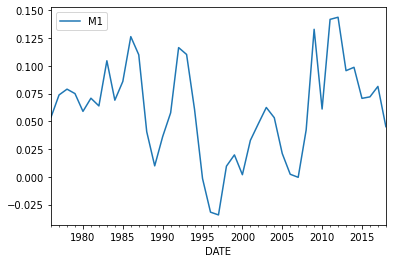

In [771]:
stationary_m1 = (np.log(m1_data) - np.log(m1_data).shift(1)).dropna()
p_value = adfuller(stationary_m1.values)[1]
print(p_value)
print(stationary_m1.shape)
stationary_m1.plot()

In [715]:
#  M2 test
p_value = adfuller(m2_data.values)[1]
print(p_value) 

1.0


0.05592024984262006
(38, 1)


<AxesSubplot:xlabel='DATE'>

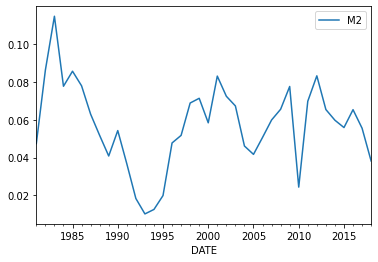

In [767]:
stationary_m2 = (np.log(m2_data) - np.log(m2_data.shift(1))).dropna()
p_value = adfuller(stationary_m2.values)[1]
print(p_value)
print(stationary_m2.shape)
stationary_m2.plot()

In [768]:
#  GDP test
p_value = adfuller(gdp_data.values)[1]
print(p_value)

0.9626020082608461


0.08517869931199712
(71, 1)


<AxesSubplot:xlabel='DATE'>

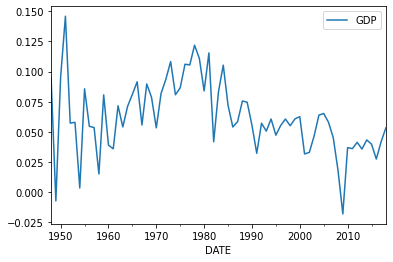

In [769]:
stationary_gdp = (np.log(gdp_data) - np.log(gdp_data.shift(1))).dropna()
p_value = adfuller(stationary_gdp.values)[1]
print(p_value)
print(stationary_gdp.shape)
stationary_gdp.plot()

## Defining Test Data

### M1

In [772]:
M1V_test_data = stationary_velocity_M1.join(stationary_mkt_cap, how = 'outer')
M1V_test_data = M1V_test_data.join(stationary_m2)
M1V_test_data = M1V_test_data.join(stationary_m1)
M1V_test_data = M1V_test_data.join(stationary_m0)
M1V_test_data = M1V_test_data.join(stationary_gdp)

M1V_test_data['MktCap'] = M1V_test_data['MktCap'].fillna(method = 'ffill')
M1V_test_data.dropna(inplace=True)

M1V_test_data = (M1V_test_data - M1V_test_data.mean())/M1V_test_data.std()
M1V_test_data.head(3)

,M1V,MktCap,M2,M1,M0,GDP
1981-12-31,0.818931,-0.374065,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-0.267172,-0.248332,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-0.266060,-0.179346,2.565725,0.986362,0.992024,1.365820


### M2

In [773]:
M2V_test_data = stationary_velocity_M2.join(stationary_mkt_cap, how = 'outer')
M2V_test_data = M2V_test_data.join(stationary_m2)
M2V_test_data = M2V_test_data.join(stationary_m1)
M2V_test_data = M2V_test_data.join(stationary_m0)
M2V_test_data = M2V_test_data.join(stationary_gdp)

M2V_test_data['MktCap'] = M2V_test_data['MktCap'].fillna(method = 'ffill')
M2V_test_data.dropna(inplace=True)
M2V_test_data = (M2V_test_data - M2V_test_data.mean())/M2V_test_data.std()
M2V_test_data.head(3)

,M2V,MktCap,M2,M1,M0,GDP
1981-12-31,1.131252,-0.374065,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-1.264153,-0.248332,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-0.827446,-0.179346,2.565725,0.986362,0.992024,1.365820


### MZM

In [774]:
MZMV_test_data = stationary_velocity_MZM.join(stationary_mkt_cap, how = 'outer')
MZMV_test_data = MZMV_test_data.join(stationary_m2)
MZMV_test_data = MZMV_test_data.join(stationary_m1)
MZMV_test_data = MZMV_test_data.join(stationary_m0)
MZMV_test_data = MZMV_test_data.join(stationary_gdp)

MZMV_test_data['MktCap'] = MZMV_test_data['MktCap'].fillna(method = 'ffill')
MZMV_test_data.dropna(inplace=True)
MZMV_test_data = (MZMV_test_data - MZMV_test_data.mean())/MZMV_test_data.std()
MZMV_test_data.head(3)

,MZMV,MktCap,M2,M1,M0,GDP
1981-12-31,1.782184,-0.374065,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-1.023979,-0.248332,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-3.772837,-0.179346,2.565725,0.986362,0.992024,1.365820


# Analysis

## M1 Velocity

Linear Regression

In [775]:
# Regression M1 velocity and Mkt Cap 
x = np.array(M1V_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(M1V_test_data['M1V'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: -0.040485683358775164 p_value: 0.8092974807051719


## M2 Velocity

### Simple Regression

In [776]:
# Regression M2 velocity and Mkt Cap 
x = np.array(M2V_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(M2V_test_data['M2V'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: 0.060023637775199874 p_value: 0.7203632563699798


### Multiple Regression

### Velocity ~ M0, M1 and GDP

In [777]:
model = ols("M2V ~ M0 + M1 + GDP", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     10.52
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           4.84e-05
Time:                        19:05:37   Log-Likelihood:                -40.941
No. Observations:                  38   AIC:                             89.88
Df Residuals:                      34   BIC:                             96.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e-18      0.122   1.42e-17      1.000      -0.248       0.248
M0             0.0955      0.142      0.672      0.506      -0.193       0.384
M1            -0.2226      0.144     -1.545      0.132      -0.515       0.070
GDP            0.6116      0.130      4.721      0.000       0.348       0.875
==============================================================================
Omnibus:                        2.439   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.549
Skew:                           0.478   Prob(JB):                        0.461
Kurtosis:                       3.254   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Velocity ~ M0, GDP and Fin Mkt

In [778]:
model = ols("M2V ~ M0 + MktCap", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.1163
Date:                Fri, 16 Apr 2021   Prob (F-statistic):              0.891
Time:                        19:05:41   Log-Likelihood:                -53.287
No. Observations:                  38   AIC:                             112.6
Df Residuals:                      35   BIC:                             117.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.674e-18      0.166   5.22e-17      1.000      -0.337       0.337
M0             0.0554      0.171      0.325      0.747      -0.291       0.402
MktCap         0.0515      0.171      0.302      0.764      -0.295       0.398
==============================================================================
Omnibus:                        2.295   Durbin-Watson:                   1.228
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                1.400
Skew:                          -0.449   Prob(JB):                        0.497
Kurtosis:                       3.281   Cond. No.                         1.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ M2 GDP and MktCap

In [779]:
model = ols("M2V ~ M2 + GDP + MktCap", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     315.4
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           7.14e-25
Time:                        19:05:50   Log-Likelihood:                 10.451
No. Observations:                  38   AIC:                            -12.90
Df Residuals:                      34   BIC:                            -6.352
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.735e-18      0.032    5.5e-17      1.000      -0.064       0.064
M2            -0.7193      0.032    -22.462      0.000      -0.784      -0.654
GDP            0.6285      0.032     19.638      0.000       0.563       0.693
MktCap         0.0438      0.032      1.371      0.179      -0.021       0.109
==============================================================================
Omnibus:                       53.790   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.595
Skew:                          -3.195   Prob(JB):                     1.65e-77
Kurtosis:                      16.509   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Granger Causality Test

In [780]:
data = M2V_test_data[['M2V', 'MktCap']]
data.head(3)

,M2V,MktCap
1981-12-31,1.131252,-0.374065
1982-12-31,-1.264153,-0.248332
1983-12-31,-0.827446,-0.179346


In [781]:
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3964  , p=0.0065  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=9.1373  , p=0.0025  , df=1
likelihood ratio test: chi2=8.1660  , p=0.0043  , df=1
parameter F test:         F=8.3964  , p=0.0065  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.8808  , p=0.0005  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=22.9489 , p=0.0000  , df=2
likelihood ratio test: chi2=17.7535 , p=0.0001  , df=2
parameter F test:         F=9.8808  , p=0.0005  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.7690  , p=0.0033  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=21.6338 , p=0.0001  , df=3
likelihood ratio test: chi2=16.8440 , p=0.0008  , df=3
parameter F test:         F=5.7690  , p=0.0033  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.3571  , p=0.0011  , df_d

In [782]:
data_inv = M2V_test_data[['MktCap', 'M2V']]
gc_res = grangercausalitytests(data_inv, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5176  , p=0.4768  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.5633  , p=0.4529  , df=1
likelihood ratio test: chi2=0.5590  , p=0.4547  , df=1
parameter F test:         F=0.5176  , p=0.4768  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0308  , p=0.9697  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=0.0715  , p=0.9649  , df=2
likelihood ratio test: chi2=0.0714  , p=0.9649  , df=2
parameter F test:         F=0.0308  , p=0.9697  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4851  , p=0.6954  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=1.8191  , p=0.6108  , df=3
likelihood ratio test: chi2=1.7734  , p=0.6207  , df=3
parameter F test:         F=0.4851  , p=0.6954  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6259  , p=0.6484  , df_d

## MZM Velocity

In [783]:
# Regression MZM velocity and Mkt Cap 

x = np.array(MZMV_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(MZMV_test_data['MZMV'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: 0.16708310332363036 p_value: 0.3160375906791296


## Velocity ~ M0, M1, M2 and GDP

In [784]:
model = ols("MZMV ~ M0 + M1 + M2 + GDP", MZMV_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     8.115
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           0.000113
Time:                        19:06:08   Log-Likelihood:                -40.400
No. Observations:                  38   AIC:                             90.80
Df Residuals:                      33   BIC:                             98.99
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.429e-17      0.122   1.99e-16      1.000      -0.248       0.248
M0            -0.0951      0.143     -0.666      0.510      -0.386       0.195
M1            -0.0357      0.149     -0.240      0.812      -0.339       0.267
M2            -0.5988      0.128     -4.681      0.000      -0.859      -0.338
GDP            0.3034      0.130      2.340      0.025       0.040       0.567
==============================================================================
Omnibus:                       18.203   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.238
Skew:                          -1.331   Prob(JB):                     2.01e-06
Kurtosis:                       6.080   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ MktCap, M0 and GDP

In [785]:
model = ols("MZMV ~ M0 + GDP + MktCap", MZMV_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.295
Date:                Fri, 16 Apr 2021   Prob (F-statistic):             0.0954
Time:                        19:06:12   Log-Likelihood:                -49.910
No. Observations:                  38   AIC:                             107.8
Df Residuals:                      34   BIC:                             114.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.429e-17      0.154   1.57e-16      1.000      -0.314       0.314
M0            -0.1672      0.159     -1.049      0.301      -0.491       0.157
GDP            0.3562      0.158      2.262      0.030       0.036       0.676
MktCap         0.2013      0.158      1.271      0.212      -0.121       0.523
==============================================================================
Omnibus:                       37.634   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.048
Skew:                          -2.195   Prob(JB):                     8.66e-32
Kurtosis:                      11.430   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ M0, M1, M2, GDP and MktCap

In [786]:
model = ols("MZMV ~ M2 + GDP + MktCap", MZMV_test_data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     11.54
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           2.27e-05
Time:                        19:06:17   Log-Likelihood:                -40.071
No. Observations:                  38   AIC:                             88.14
Df Residuals:                      34   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.429e-17      0.119   2.04e-16      1.000      -0.242       0.242
M2            -0.6041      0.121     -4.991      0.000      -0.850      -0.358
GDP            0.3032      0.121      2.507      0.017       0.057       0.549
MktCap         0.1481      0.121      1.226      0.229      -0.098       0.394
==============================================================================
Omnibus:                       24.099   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.559
Skew:                          -1.648   Prob(JB):                     3.48e-10
Kurtosis:                       7.079   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Granger Causality Test

In [787]:
data = MZMV_test_data[['MZMV', 'MktCap']]
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5501  , p=0.2216  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=1.6868  , p=0.1940  , df=1
likelihood ratio test: chi2=1.6495  , p=0.1990  , df=1
parameter F test:         F=1.5501  , p=0.2216  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7887  , p=0.4633  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=1.8318  , p=0.4002  , df=2
likelihood ratio test: chi2=1.7867  , p=0.4093  , df=2
parameter F test:         F=0.7887  , p=0.4633  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9513  , p=0.4293  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=3.5675  , p=0.3121  , df=3
likelihood ratio test: chi2=3.3972  , p=0.3343  , df=3
parameter F test:         F=0.9513  , p=0.4293  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9202  , p=0.4678  , df_d

## VAR Analysis

In [689]:
from statsmodels.tsa.api import VAR

In [788]:
model = VAR(M1V_test_data)
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Apr, 2021
Time:                     19:06:27
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -4.08157
Nobs:                     34.0000    HQIC:                  -8.51904
Log likelihood:           44.4002    FPE:                0.000234710
AIC:                     -10.8155    Det(Omega_mle):     8.59592e-06
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.018604         0.105008           -0.177           0.859
L1.M1V           -2.728890         1.627273           -1.677           0.094
L1.MktCap         0.800654         0.142520            5.618           0.000
L

In [793]:
model = VAR(M2V_test_data)
results = model.fit(2)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Apr, 2021
Time:                     19:08:08
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -4.91632
Nobs:                     36.0000    HQIC:                  -7.14978
Log likelihood:          -78.2398    FPE:                0.000290865
AIC:                     -8.34728    Det(Omega_mle):     4.57435e-05
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.163868         0.121449            1.349           0.177
L1.M2V           -3.096994         1.889548           -1.639           0.101
L1.MktCap         0.456973         0.121091            3.774           0.000
L